# **Welcome to allWomen's Data Analytics Masterclass!**

Who of you has coded before?

For our newbies, here comes your first line of code:

In [ ]:
print('Hello World')

Hello World


In [ ]:
print(' ')

##**Overview of what we will see today:**



1.   The Data Scientific Method
2.   Study case: Hotel Bookings



## **1. The Data Scientific Method**



![picture](https://drive.google.com/uc?id=1tOFuTRHoez6ZbI03vzY8hUyh9ubvkqca)

[Full article about the Data Scientific Method](https://towardsdatascience.com/a-data-scientific-method-80caa190dbd4)

## **2. Study case: Hotel Bookings**

*Dataset extracted from Kaggle*


### **1. Importing our Python Libraries**


In [ ]:
# Numpy and Pandas libraries
import numpy as np
import pandas as pd
import sklearn

# Visualization libraries
!pip install squarify
import squarify
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

### **2. Loading and Exploratory Data Analysis (EDA)**


In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/m-vila/data-analysis-workshop/main/hotel_bookings.csv")

In [ ]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


#### From which year is this dataset?

In [ ]:
data['arrival_date_year'].unique()

array([2015, 2016, 2017])

#### How many hotels do we have? And what about the variables that we are going to use?

In [ ]:
data.shape

(119390, 32)

We have 119.390 hotels in our dataset.

We can see that 32 variables are describing each hotel. How do they look like?

In [ ]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
data.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [ ]:
# We will define a a function to map the amount and % of missing values for the different variables

def show_null(df):
    null_columns = ((df.isnull().sum(axis = 0)/len(df)).sort_values(ascending=False)*100).index
    null_data = pd.concat([df.isnull().sum(axis = 0),
                           ((df.isnull().sum(axis = 0)/len(df)).sort_values(ascending=False)*100),
                           df.loc[:, df.columns.isin(list(null_columns))].dtypes]
                          , axis=1, sort= 'True')
    null_data = null_data.rename(columns={0: 'Amount', 
                                          1: 'Missing data (%)', 
                                          2: 'type'}).sort_values(ascending=False, by = 'Missing data (%)')
    null_data = null_data[null_data["Amount"]!=0]
    return null_data

pd.set_option('display.max_rows', None) # I want to show all the results
show_null(data) 

,Amount,Missing data (%),type
company,112593,94.306893,float64
agent,16340,13.686238,float64
country,488,0.408744,object
children,4,0.003350,float64


In [ ]:
#@title
nan_replacements = {"children:": 0.0,"country": "Unknown", "agent": 0, "company": 0}
data_clean = data.fillna(nan_replacements)

# "meal" contains values "Undefined", which is equal to SC.
data_clean["meal"].replace("Undefined", "SC", inplace=True)

# Some rows contain entreis with 0 adults, 0 children and 0 babies. 
# I'm dropping entries with no guests.
zero_guests = list(data_clean.loc[data_clean["adults"]
                   + data_clean["children"]
                   + data_clean["babies"]==0].index)
data_clean.drop(data_clean.index[zero_guests], inplace=True)

#### Let's drop the missing values!

In [ ]:
hotels = data_clean.dropna()

In [ ]:
hotels.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

### **3. Let's ask some questions to the data:**


#### **3.1. How many types of hotels do we have?**
`type` of variable = `dataframe ['Name of the variable']. unique()`

In [ ]:
hotels['hotel'].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

#### **And how many hotels do we have in each category?**

`dataframe ['Name of the variable']. value_counts()`

In [ ]:
hotels['hotel'].value_counts()

City Hotel      79159
Resort Hotel    40047
Name: hotel, dtype: int64

#### Let's create our first plot!

#### **Bar plot:**

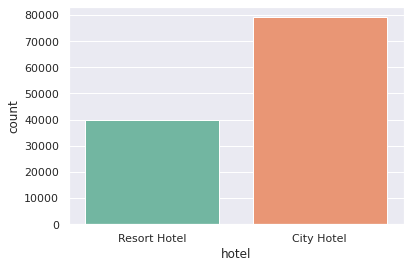

In [ ]:
sns.set(style="darkgrid")
ax = sns.countplot(x="hotel", data=hotels, palette="Set2")

#### **Pie chart**

a) Seaborn library

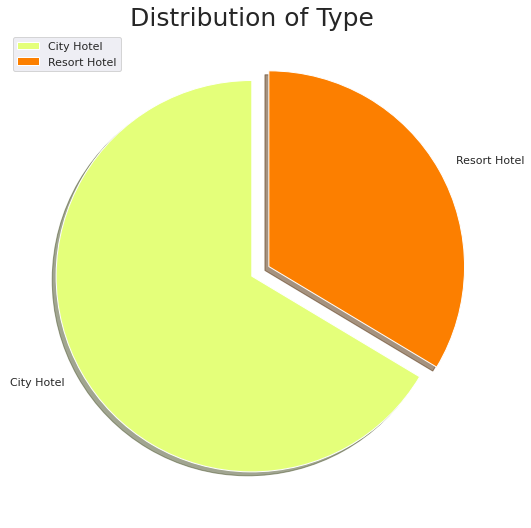

In [ ]:
labels = ['City Hotel', 'Resort Hotel']
size = hotels['hotel'].value_counts()
colors = plt.cm.Wistia(np.linspace(0, 1, 2))
explode = [0, 0.1]

plt.rcParams['figure.figsize'] = (9, 9)
plt.pie(size,labels=labels, colors = colors, explode = explode, shadow = True, startangle = 90)
plt.title('Distribution of Type', fontsize = 25)
plt.legend()
plt.show()

b) Plotly library

In [ ]:
col = "hotel"
grouped = hotels[col].value_counts().reset_index()
grouped = grouped.rename(columns = {col : "count", "index" : col})

## plot
trace = go.Pie(labels=grouped[col], values=grouped['count'], pull=[0.05, 0], marker=dict(colors=["#6ad49b", "#a678de"]))
layout = go.Layout(title="", height=600, legend=dict(x=0.1, y=1.1))
fig = go.Figure(data = [trace], layout = layout)
iplot(fig)

#### **Question**: What is your opinion about those values? Are they equally distributed? Can you think on any reason why?

#### **3.2. Where do the guests come from?**


For this, we will have to use `value_counts()` again!

In [ ]:
country_data = hotels['country']
country_counting = country_data.value_counts()
country_counting

PRT        48479
GBR        12120
FRA        10401
ESP         8560
DEU         7285
ITA         3761
IRL         3374
BEL         2342
BRA         2222
NLD         2103
USA         2093
CHE         1726
CN          1279
AUT         1263
SWE         1020
CHN          999
POL          918
ISR          669
RUS          630
NOR          607
ROU          500
Unknown      478
FIN          446
DNK          435
AUS          426
AGO          362
LUX          286
MAR          259
TUR          248
HUN          230
ARG          214
JPN          197
CZE          171
IND          151
KOR          133
GRC          128
DZA          103
SRB          101
HRV          100
MEX           85
EST           83
IRN           82
LTU           81
ZAF           80
BGR           75
NZL           74
COL           71
UKR           68
MOZ           67
CHL           65
SVK           65
THA           59
ISL           57
SVN           56
LVA           55
ARE           51
CYP           51
TWN           51
SAU           

#### Let's create a new variable with the top 10 countries



In [ ]:
tot = sum(country_counting)
top10 = sum(country_counting[:10]) 

print(f'total : {tot}')
print(f'top 10 countries : {top10}')
print(f'percentage : {top10}/{tot} = {100 * top10/tot}')

total : 119206
top 10 countries : 100647
percentage : 100647/119206 = 84.43115279432243


In [ ]:
top10_country = country_counting.head(10)

### Bar & Pie Plots


Bar and pie graphs are the most powerful tool

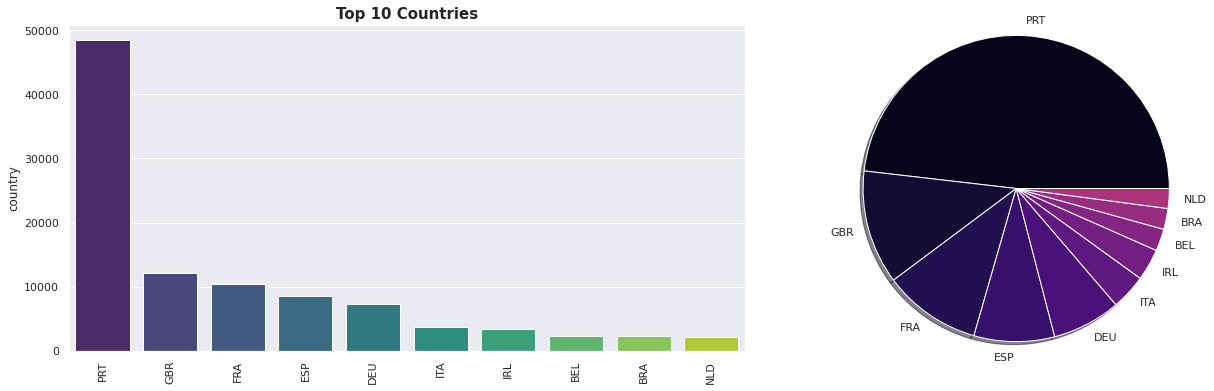

In [ ]:
from matplotlib import gridspec

fig = plt.figure(figsize=(20, 6))
gs = gridspec.GridSpec(nrows=1, ncols=2,
                       height_ratios=[6], 
                       width_ratios=[10, 5])

ax = plt.subplot(gs[0])
sns.barplot(top10_country.index, top10_country, ax=ax, palette="viridis")
ax.set_xticklabels(top10_country.index, rotation='90')
ax.set_title('Top 10 Countries', fontsize=15, fontweight='bold')

explode = [0 for _ in range(20)]
explode[0] = 0.06

ax2 = plt.subplot(gs[1])
ax2.pie(top10_country, labels=top10_country.index,
        shadow=True, startangle=0,
        colors = sns.color_palette("magma", n_colors=20)
       )
ax2.axis('equal') 

plt.show()

#### You can make interactive plots as well with Plotly!

In [ ]:
import plotly.graph_objects as go

colors = ['gold', 'mediumturquoise', 'darkorange', 'lightgreen']

labels = ['PRT', 'GBR', 'FRA', 'ESP', 'DEU', 'ITA', 'IRL', 'BEL', 'BRA', 'NDL']
values = top10_country

fig = go.Figure(data=[go.Pie(labels=labels,
                             values=values, 
                            title='% Home country of guests', pull=[0.1, 0])])
fig.update_traces(hoverinfo='label+percent+value', textinfo='percent+label', textfont_size=15,
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)))
fig.show()

In [ ]:
# get number of actual guests by country
country_data = pd.DataFrame(hotels.loc[hotels["is_canceled"] == 0]["country"].value_counts())
country_data.rename(columns={"country": "Number of Guests"}, inplace=True)
total_guests = country_data["Number of Guests"].sum()
country_data["Guests in %"] = round(country_data["Number of Guests"] / total_guests * 100, 2)
country_data["country"] = country_data.index


# show on map
guest_map = px.choropleth(country_data,
                    locations=country_data.index,
                    color=country_data["Guests in %"], 
                    hover_name=country_data.index, 
                    color_continuous_scale=px.colors.sequential.Plasma,
                    title="Home country of guests in a Map")
guest_map.show()

#### **3.3 How much do guests pay for a room per night?**


In [ ]:
#@title
rh = hotels[(hotels["hotel"] == "Resort Hotel") & (hotels["is_canceled"] == 0)]
ch = hotels[(hotels["hotel"] == "City Hotel") & (hotels["is_canceled"] == 0)]

# Counting adults and children as paying guests only, not babies.
rh["adr_pp"] = rh["adr"] / (rh["adults"] + rh["children"])
ch["adr_pp"] = ch["adr"] / (ch["adults"] + ch["children"])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
print("""From all non-canceled bookings, across all room types and meals, the average prices are:
Resort hotel: {:.2f} € per night and person.
City hotel: {:.2f} € per night and person."""
      .format(rh["adr_pp"].mean(), ch["adr_pp"].mean()))

From all non-canceled bookings, across all room types and meals, the average prices are:
Resort hotel: 47.49 € per night and person.
City hotel: 59.27 € per night and person.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



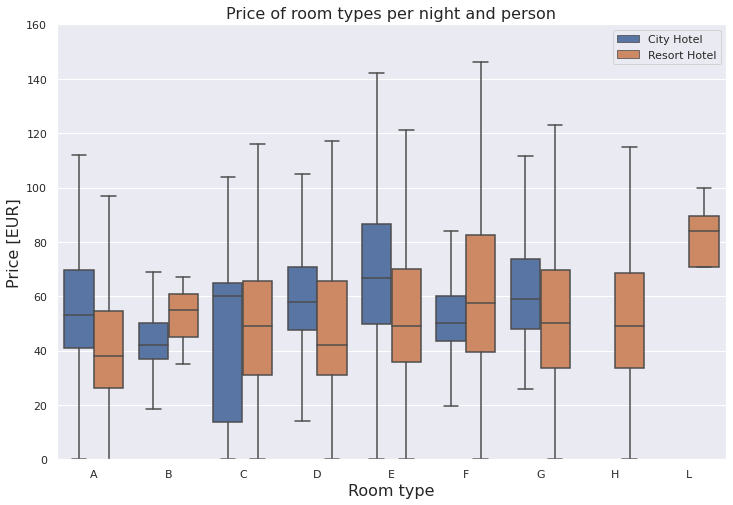

In [ ]:
# normalize price per night (adr):
hotels["adr_pp"] = hotels["adr"] / (hotels["adults"] + hotels["children"])
data_guests = hotels.loc[hotels["is_canceled"] == 0] # only actual gusts
room_prices = data_guests[["hotel", "reserved_room_type", "adr_pp"]].sort_values("reserved_room_type")

# boxplot:
plt.figure(figsize=(12, 8))
sns.boxplot(x="reserved_room_type",
            y="adr_pp",
            hue="hotel",
            data=room_prices, 
            hue_order=["City Hotel", "Resort Hotel"],
            fliersize=0)
plt.title("Price of room types per night and person", fontsize=16)
plt.xlabel("Room type", fontsize=16)
plt.ylabel("Price [EUR]", fontsize=16)
plt.legend(loc="upper right")
plt.ylim(0, 160)
plt.show()

#### **3.4 How does the price per night vary over the year?**


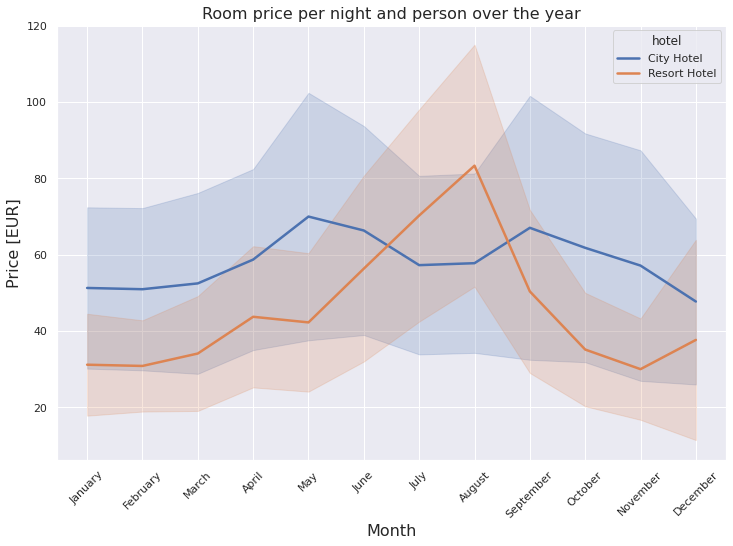

In [ ]:
# grab data:
room_prices_mothly = data_guests[["hotel", "arrival_date_month", "adr_pp"]].sort_values("arrival_date_month")

# order by month:
ordered_months = ["January", "February", "March", "April", "May", "June", 
          "July", "August", "September", "October", "November", "December"]
room_prices_mothly["arrival_date_month"] = pd.Categorical(room_prices_mothly["arrival_date_month"], categories=ordered_months, ordered=True)

# barplot with standard deviation:
plt.figure(figsize=(12, 8))
sns.lineplot(x = "arrival_date_month", y="adr_pp", hue="hotel", data=room_prices_mothly, 
            hue_order = ["City Hotel", "Resort Hotel"], ci="sd", size="hotel", sizes=(2.5, 2.5))
plt.title("Room price per night and person over the year", fontsize=16)
plt.xlabel("Month", fontsize=16)
plt.xticks(rotation=45)
plt.ylabel("Price [EUR]", fontsize=16)
plt.show()

#### **3.5 How long do people stay at the hotels**


In [ ]:
#@title
# Create a DateFrame with the relevant data:
rh["total_nights"] = rh["stays_in_weekend_nights"] + rh["stays_in_week_nights"]
ch["total_nights"] = ch["stays_in_weekend_nights"] + ch["stays_in_week_nights"]

num_nights_res = list(rh["total_nights"].value_counts().index)
num_bookings_res = list(rh["total_nights"].value_counts())
rel_bookings_res = rh["total_nights"].value_counts() / sum(num_bookings_res) * 100 # convert to percent

num_nights_cty = list(ch["total_nights"].value_counts().index)
num_bookings_cty = list(ch["total_nights"].value_counts())
rel_bookings_cty = ch["total_nights"].value_counts() / sum(num_bookings_cty) * 100 # convert to percent

res_nights = pd.DataFrame({"hotel": "Resort hotel",
                           "num_nights": num_nights_res,
                           "rel_num_bookings": rel_bookings_res})

cty_nights = pd.DataFrame({"hotel": "City hotel",
                           "num_nights": num_nights_cty,
                           "rel_num_bookings": rel_bookings_cty})

nights_data = pd.concat([res_nights, cty_nights], ignore_index=True)

nights_data = nights_data[(nights_data.num_nights != 0)]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



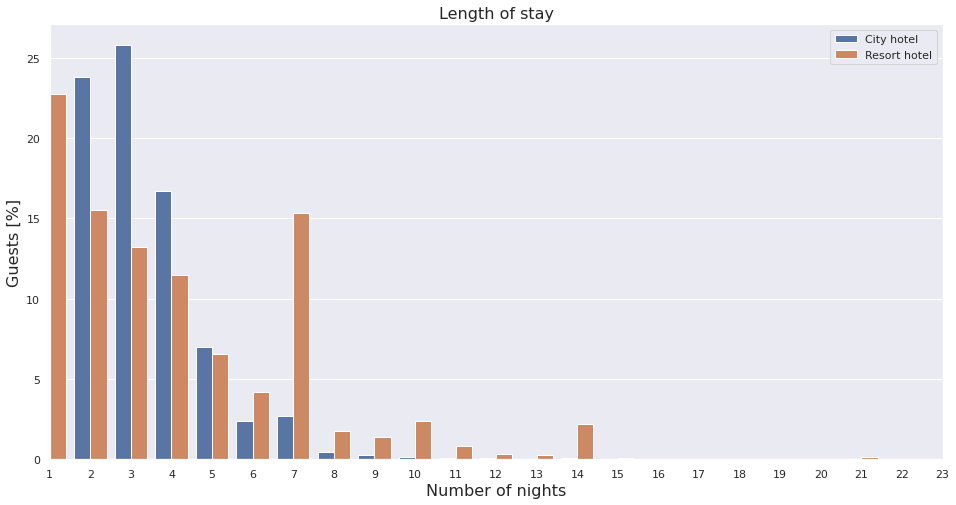

In [ ]:
#show figure:
plt.figure(figsize=(16, 8))
sns.barplot(x = "num_nights", y = "rel_num_bookings", hue="hotel", data=nights_data,
            hue_order = ["City hotel", "Resort hotel"])
plt.title("Length of stay", fontsize=16)
plt.xlabel("Number of nights", fontsize=16)
plt.ylabel("Guests [%]", fontsize=16)
plt.legend(loc="upper right")
plt.xlim(0,22)
plt.show()

### ...and last but not least

### **3.6  Let's create an interactive map per year and country**

In [ ]:
hotels.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,adr_pp
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01,0.0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01,0.0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,75.0
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,75.0
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out,2015-07-03,49.0


In [ ]:
hotels = hotels[(hotels.country != 'Unknown')]

In [ ]:
#@title
year_country = hotels.groupby('arrival_date_year')['country'].value_counts().reset_index(name='counts')
fig = px.choropleth(year_country, locations="country", color="counts", 
                    locationmode='ISO-3',
                    animation_frame='arrival_date_year',
                    range_color=[0,20],
                    color_continuous_scale=px.colors.sequential.OrRd
                   )

fig.update_layout(title='Comparison by country')
fig.show()

### **Resources for learners**

---
   
1. [Beginners guide for non-programmers](https://wiki.python.org/moin/BeginnersGuide/NonProgrammers)
2.   [Python Sample Code](https://wiki.python.org/moin/BeginnersGuide/Examples)


